In [46]:
#Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sqlalchemy import create_engine
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 10})

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1UGJhTd01_AmzcTnZxiySE5bOGaHkcm8h')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


**Описание датасета**


| № | Столбец            | Описание                                                                                   |
|---|--------------------|-------------------------------------------------------------------------------------------|
| 1 | index              | Номер строки в файле                                                                      |
| 2 | player_name        | Имя игрока                                                                                |
| 3 | team_abbreviation  | Краткое сокращение команды                                                                |
| 4 | age                | Возраст игрока                                                                            |
| 5 | player_height      | Рост игрока                                                                               |
| 6 | player_weight      | Вес игрока                                                                                |
| 7 | college            | Учебное заведение игрока                                                                  |
| 8 | country            | Страна игрока                                                                             |
| 9 | draft_year         | Год найма (драфта)                                                                       |
|10 | draft_round        | Раунд найма (драфта)                                                                     |
|11 | draft_number       | Номер игрока в найме (драфте)                                                             |
|12 | gp                 | Количество игр игрока за сезон                                                            |
|13 | pts                | Среднее число очков за игру                                                               |
|14 | reb                | Среднее число подборов за игру                                                            |
|15 | ast                | Среднее число голевых пасов за игру                                                       |
|16 | net_rating         | Разница очков команды за 100 владений, пока игрок находится на площадке                   |
|17 | oreb_pct           | Процент доступных подборов в нападении, которые игрок захватил, находясь на площадке       |
|18 | dreb_pct           | Процент доступных подборов в защите, которые игрок захватил, находясь на площадке          |
|19 | usg_pct            | Процент командных игр, использованных игроком, пока он находился на площадке               |
|20 | ts_pct             | Мера эффективности броска игрока, учитывающая штрафные броски, 2- и 3-очковые броски      |
|21 | ast_pct            | Процент бросков с игры товарищей по команде, которым игрок ассистировал, находясь на площадке |
|22 | season             | Сезон                                                                                     |


####Исследование данных

In [ ]:
#Удаление ненужного столбца
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.shape

(12305, 21)

#Сохранение в базу данных

In [ ]:
#Создание подключения
engine = create_engine('sqlite:///database.db', echo = True)

In [ ]:
#Выгрузка в БД
df.to_sql('sport_df', con=engine, if_exists='replace')

In [ ]:
#В датасете наблюдаются, как категориальные, так и числовые столбцы
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [ ]:
#Просмотр описательной статистики для числовых столбцов
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [ ]:
#Просмотр описательной статистики для категориальных столбцов
df.describe(include = ['object'])

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,12305,12305,10516,12305,12305,12305,12305,12305
unique,2463,36,346,82,47,9,76,26
top,Vince Carter,CLE,Kentucky,USA,Undrafted,1,Undrafted,2021-22
freq,22,433,420,10308,2224,7071,2277,605


In [ ]:
#Проверка наличия пропущенных значений
df.isna().sum()

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1789
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

#Зависимость роста от веса игрока


##Линейная регрессия

In [ ]:
#Выбираем уникальных игроков, берем среднее по росту и весу
data = df[['player_name', 'player_height', 'player_weight']].groupby(['player_name'], as_index=False).mean(numeric_only=True)
data.head(5)

,player_name,player_height,player_weight
0,A.C. Green,205.74,102.058200
1,A.J. Bramlett,208.28,102.965384
2,A.J. Guyton,185.42,81.646560
3,AJ Hammons,213.36,117.933920
4,AJ Price,187.96,84.821704


In [ ]:
data.shape

(2463, 3)

In [ ]:
X = data[['player_weight']]
y = data['player_height']
#Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
linear_regression = Pipeline([
    ('Scaler', StandardScaler()),
    ('LR', LinearRegression())
])

linear_regression.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(linear_regression.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(linear_regression.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.672
R2 для тестовой выборки: 0.684


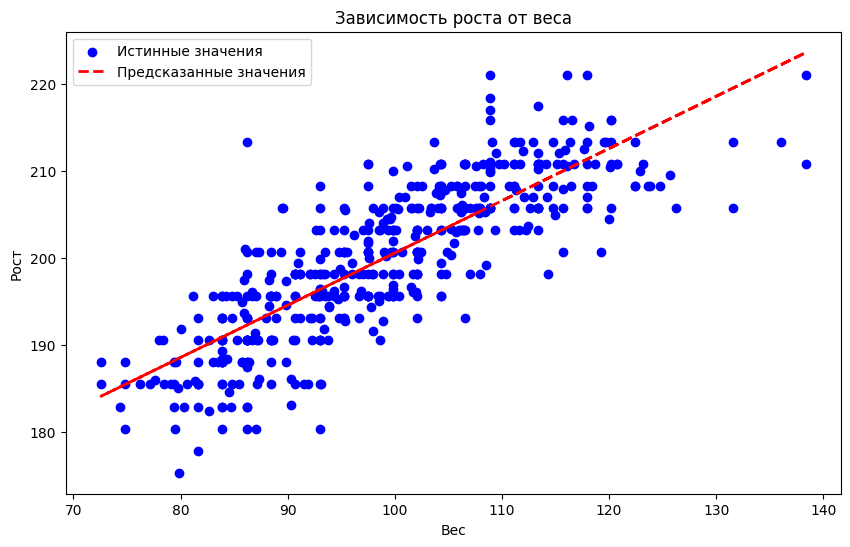

In [ ]:
plt.scatter(X_test, y_test, color='blue', label = 'Истинные значения')
plt.plot(X_test, linear_regression.predict(X_test), 'r--', lw = 2, label = 'Предсказанные значения')
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.title('Зависимость роста от веса')
plt.legend()
plt.show()

##Логистическая регрессия

In [ ]:
#Предварительное разделение на классы по росту: высокий и низкий
data['height_category'] = data['player_height'].apply(lambda x: 1 if x > data['player_height'].mean() else 0)


In [ ]:
data.head()

,player_name,player_height,player_weight,height_category
0,A.C. Green,205.74,102.058200,1
1,A.J. Bramlett,208.28,102.965384,1
2,A.J. Guyton,185.42,81.646560,0
3,AJ Hammons,213.36,117.933920,1
4,AJ Price,187.96,84.821704,0


In [ ]:
X = data[['player_weight']]
y = data['height_category']
#Разделим их на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
logistic_regression = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

logistic_regression.fit(X_train, y_train)

print('Точность на тренировочной выборке:', round(logistic_regression.score(X_train, y_train), 3))
print('Точность на тестовой выборке:', round(logistic_regression.score(X_test, y_test), 3))

Точность на тренировочной выборке: 0.836
Точность на тестовой выборке: 0.85


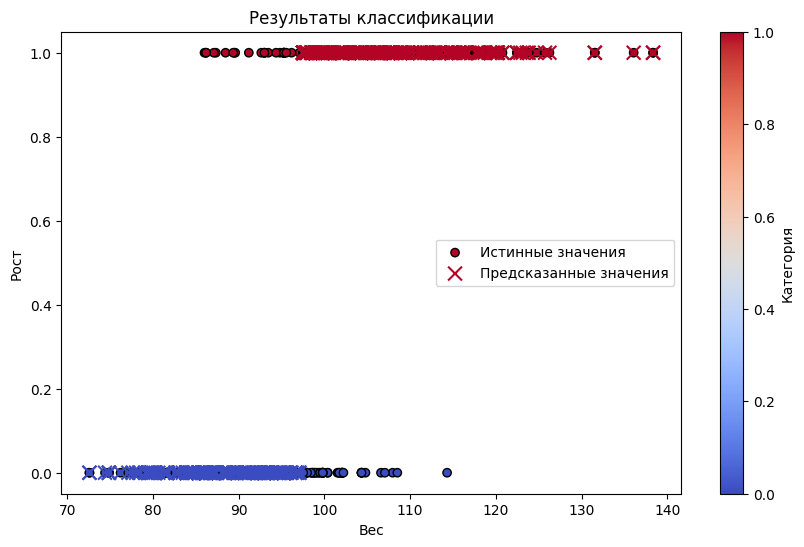

In [ ]:
y_pred = logistic_regression.predict(X_test)
plt.scatter(X_test, y_test, c=y_test, cmap='coolwarm', edgecolors='k', label='Истинные значения')
plt.scatter(X_test, y_pred, c=y_pred, cmap='coolwarm', marker='x', s=100, label='Предсказанные значения')
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.title('Результаты классификации')
plt.legend()
plt.colorbar(label='Категория')
plt.show()

##SVM

In [ ]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

svm_pipeline.fit(X_train, y_train)

train_accuracy = svm_pipeline.score(X_train, y_train)
test_accuracy = svm_pipeline.score(X_test, y_test)

print('Точность на тренировочной выборке:', round(train_accuracy, 3))
print('Точность на тестовой выборке:', round(test_accuracy, 3))

Точность на тренировочной выборке: 0.838
Точность на тестовой выборке: 0.844


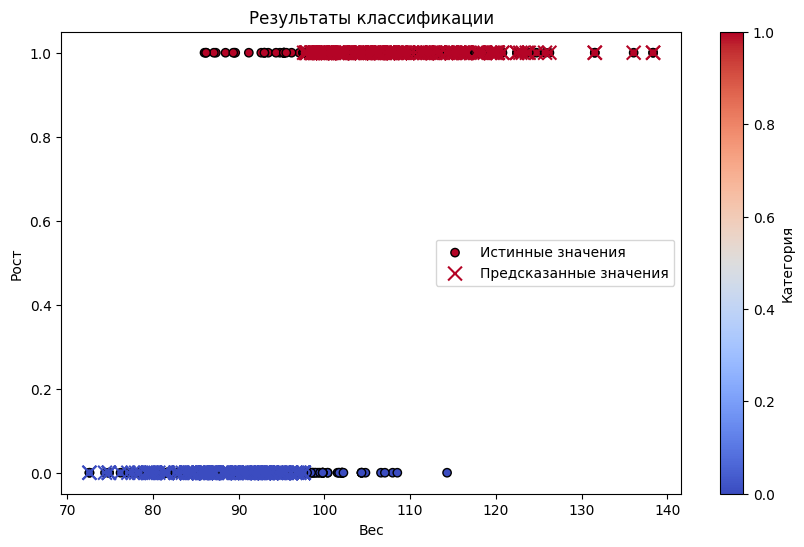

In [ ]:
y_pred = svm_pipeline.predict(X_test)
plt.scatter(X_test, y_test, c=y_test, cmap='coolwarm', edgecolors='k', label='Истинные значения')
plt.scatter(X_test, y_pred, c=y_pred, cmap='coolwarm', marker='x', s=100, label='Предсказанные значения')
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.title('Результаты классификации')
plt.legend()
plt.colorbar(label='Категория')
plt.show()


#Прогнозирование названия команды

Используя алгоритм Дерева Принятия Решения попробуйте определить
название команды (team_abbreviation) как целевое значение функции (Y) за сезон 2010-11 от следующих атрибутов (𝑋)
- Среднее pts всех игроков команды за сезон
- Среднее reb всех игроков команды за сезон
- Среднее ast всех игроков команды за сезон
- Среднее player_height всех игроков команды за сезон
- Среднее player_width всех игроков команды за сезон


In [ ]:
# Выбор сезона и подсчет средних
data = df[df['season'] == '2010-11']
data = data[['team_abbreviation', 'pts', 'reb', 'ast', 'player_height', 'player_weight']].groupby(['team_abbreviation'], as_index = False).mean(numeric_only = True)
data.head(5)

,team_abbreviation,pts,reb,ast,player_height,player_weight
0,ATL,7.892857,3.435714,1.828571,203.2000,105.298143
1,BOS,8.437500,3.525000,2.000000,200.9775,103.674121
2,CHA,6.668750,3.175000,1.512500,201.6125,102.001501
3,CHI,8.300000,3.928571,1.828571,200.6600,99.207050
4,CLE,8.506250,3.875000,1.787500,200.9775,102.426744


In [ ]:
X = data.drop('team_abbreviation', axis=1)
Y = data['team_abbreviation']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=28)

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

print('Точность на тренировочной выборке:', round(DTC.score(X_train, y_train), 3))
print('Точность на тестовой выборке:', round(DTC.score(X_test, y_test), 3))

Точность на тренировочной выборке: 1.0
Точность на тестовой выборке: 0.0


#Классификация игроков по эффективности

Классификация игроков будет происходить по **ts_pct** - мера эффективности броска игрока, учитывающая штрафные броски, 2- и 3-очковые броски, посмотрим распределение этой величины и создадим новый вычисляемый признак, обозначающий насколько был эффективен игрок в сезоне.

In [ ]:
df['ts_pct'].describe()

count    12305.000000
mean         0.511060
std          0.101163
min          0.000000
25%          0.480000
50%          0.524000
75%          0.561000
max          1.500000
Name: ts_pct, dtype: float64

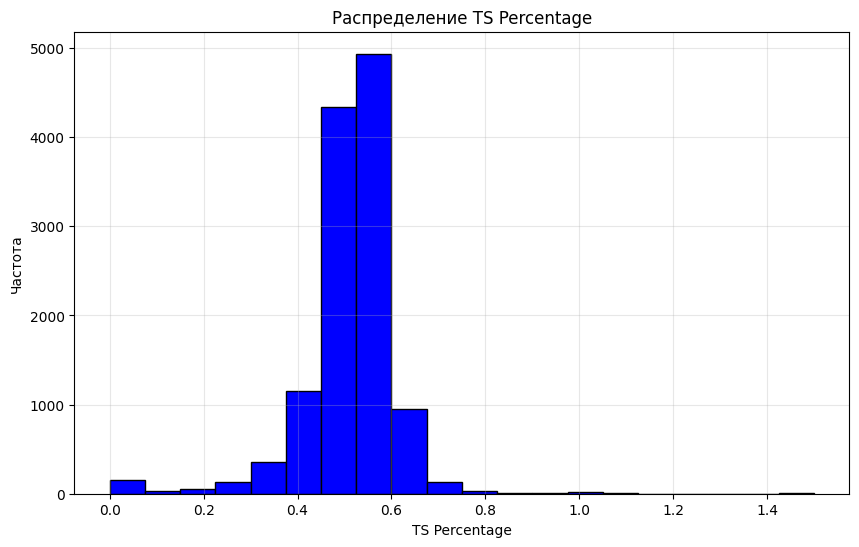

In [ ]:
plt.hist(df['ts_pct'], bins=20, color='blue', edgecolor='black')
plt.xlabel('TS Percentage')
plt.ylabel('Частота')
plt.title('Распределение TS Percentage')
plt.grid(True, alpha=0.3)
plt.show()

In [71]:
# Определение границ классов на основе квантилей
low_threshold = df['ts_pct'].quantile(0.25)
mid_threshold = df['ts_pct'].quantile(0.5)
high_threshold = df['ts_pct'].quantile(0.75)

# Функция для классификации TS Percentage
def classify_ts_percentage(ts_pct):
    if ts_pct < low_threshold:
        return 'Низкая эффективность'
    elif ts_pct < mid_threshold:
        return 'Средняя'
    elif ts_pct < high_threshold:
        return 'Выше среднего'
    else:
        return 'Высокая'

df['efficiency_class'] = df['ts_pct'].apply(classify_ts_percentage)

# Вывод количества значений в каждом классе
print(df['efficiency_class'].value_counts())


efficiency_class
Средняя                 3093
Высокая                 3089
Выше среднего           3077
Низкая эффективность    3046
Name: count, dtype: int64


In [72]:
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,efficiency_class
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,Низкая эффективность
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,Низкая эффективность
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,Низкая эффективность
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,Низкая эффективность
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,Высокая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,13,...,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22,Выше среднего
12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,1,...,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22,Средняя
12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,6,...,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22,Выше среднего
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22,Низкая эффективность


Выбор признаков для построения классификации состоит в том, чтобы визуализировать значения признаков для каждого из прогнозируемых классов. Если разница между классами заметна (например, различия в медиане, интерквартильном размахе), то признак, вероятно, важен для классификации.

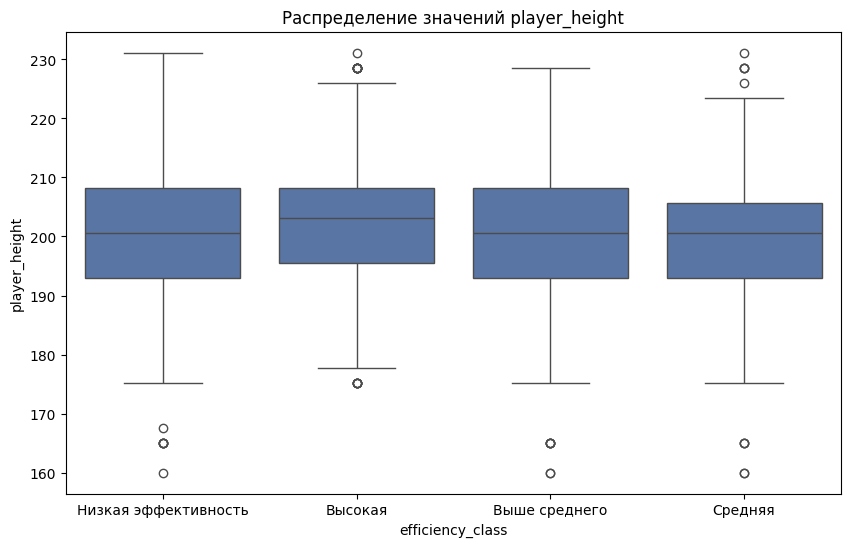

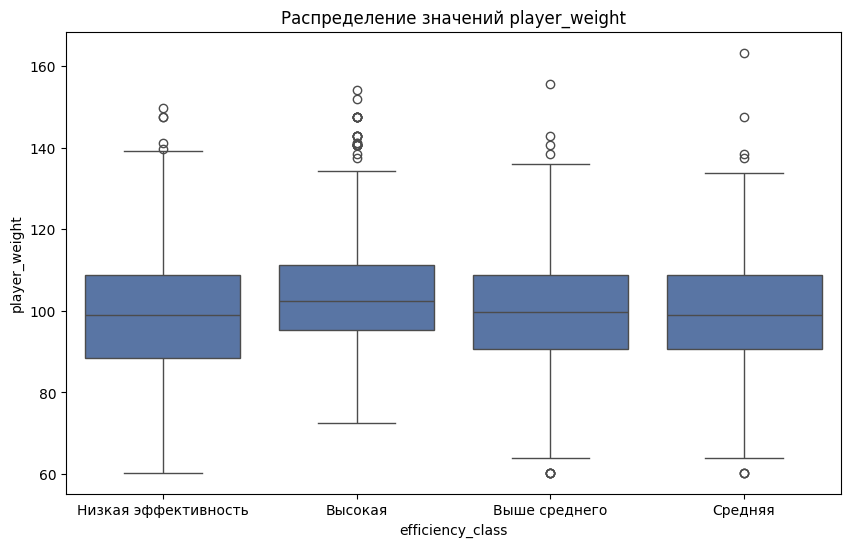

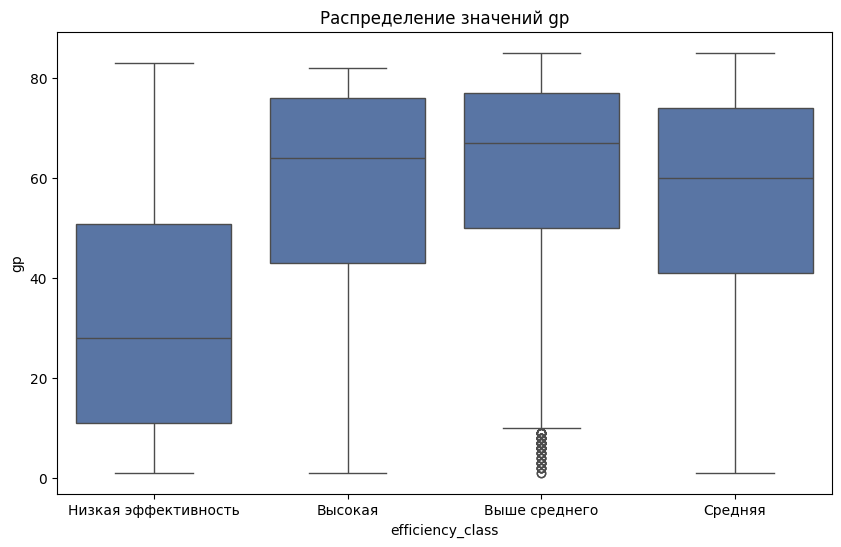

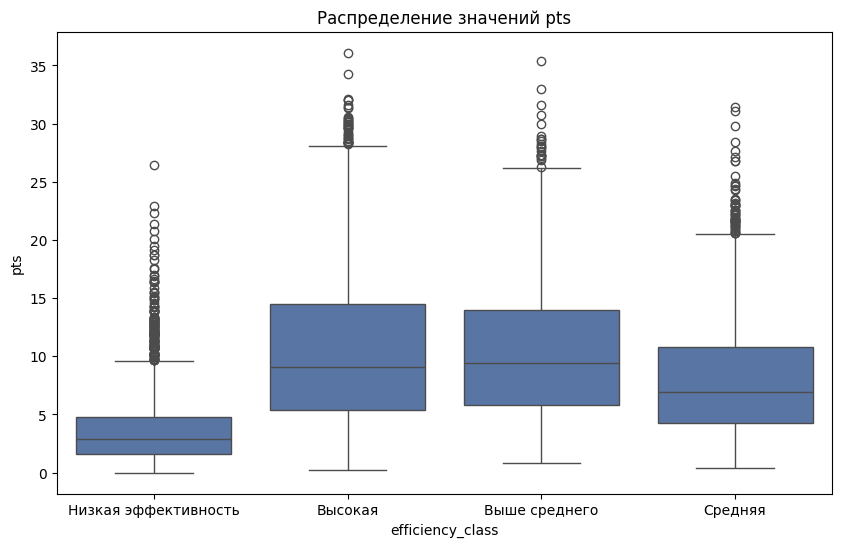

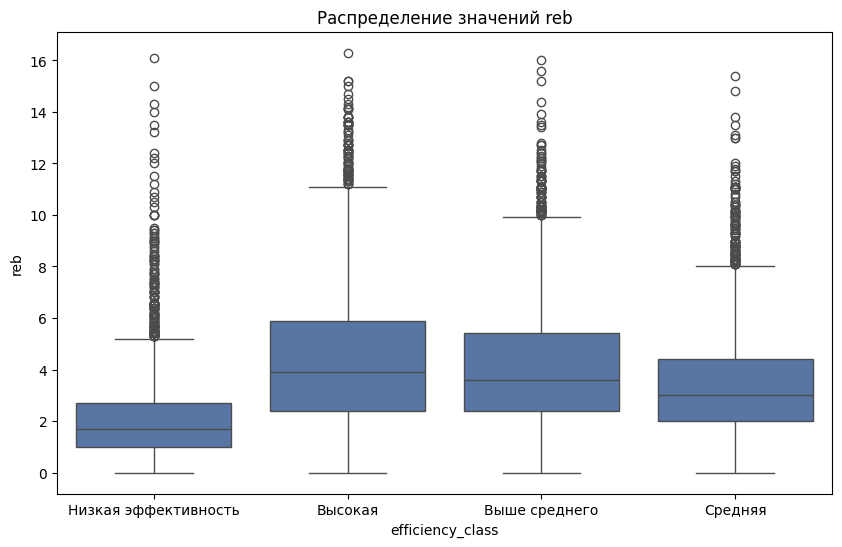

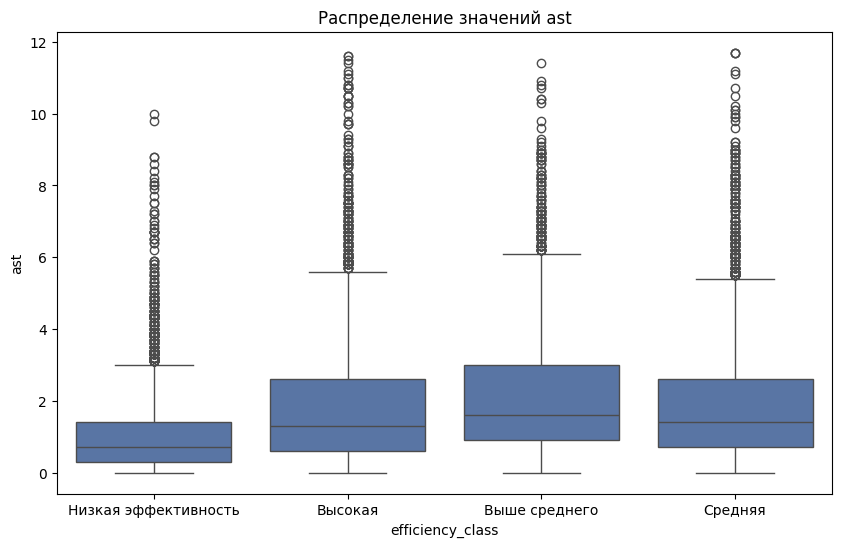

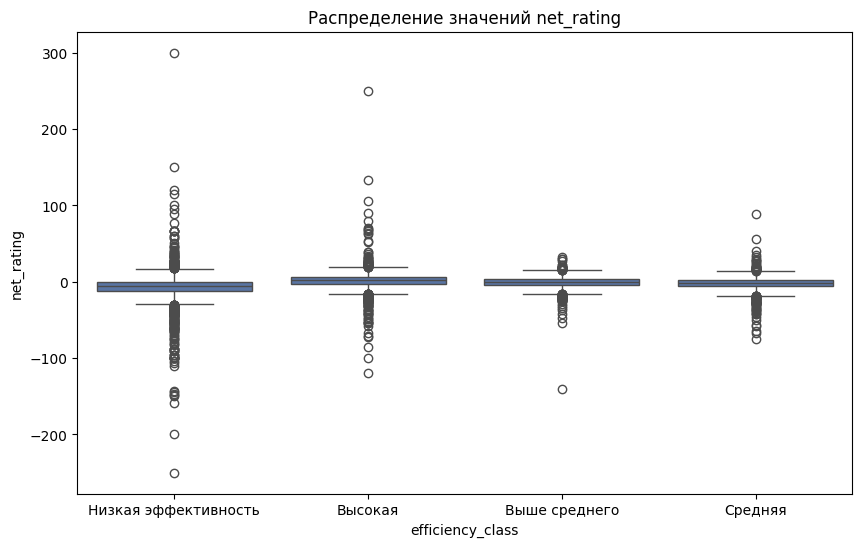

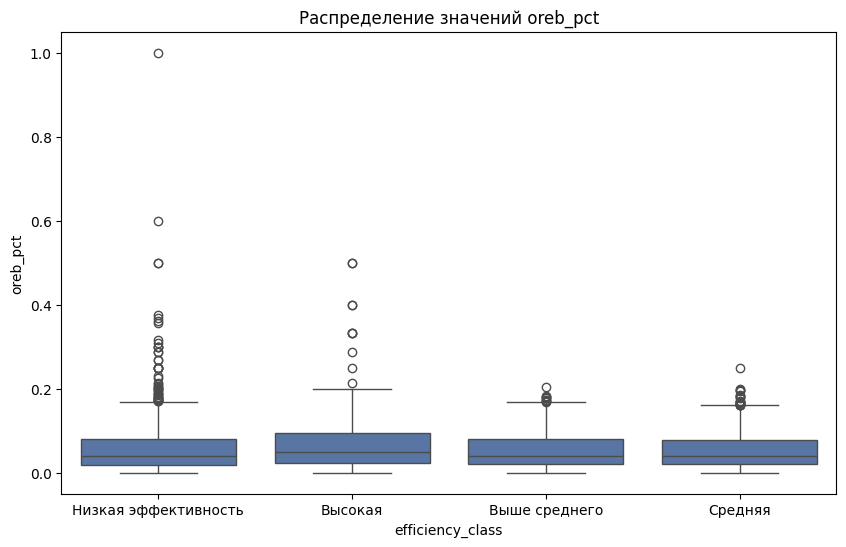

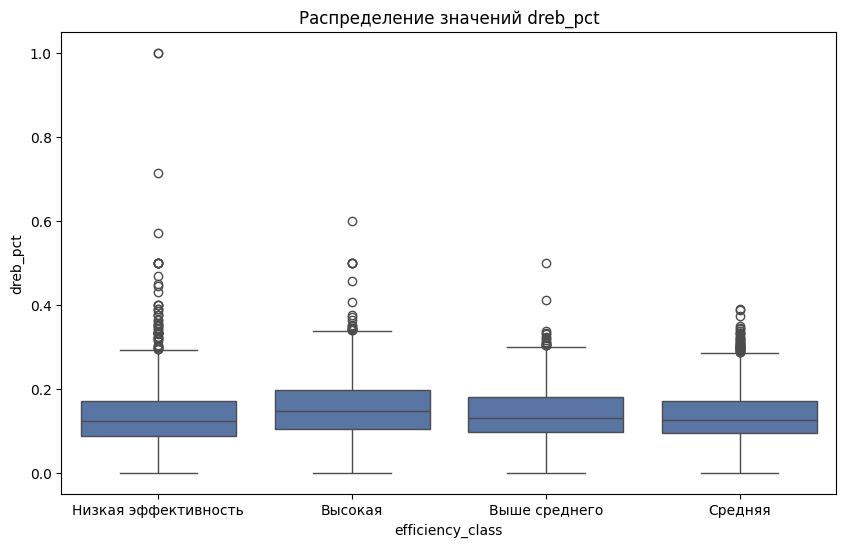

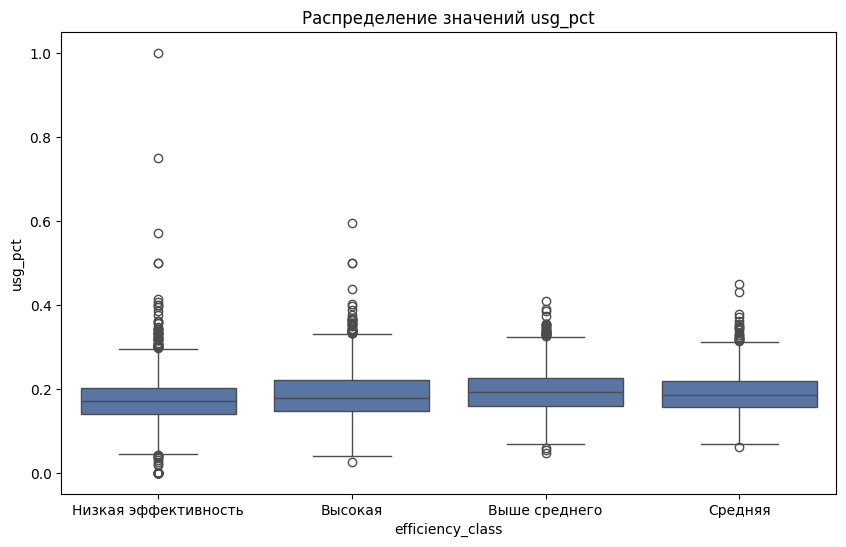

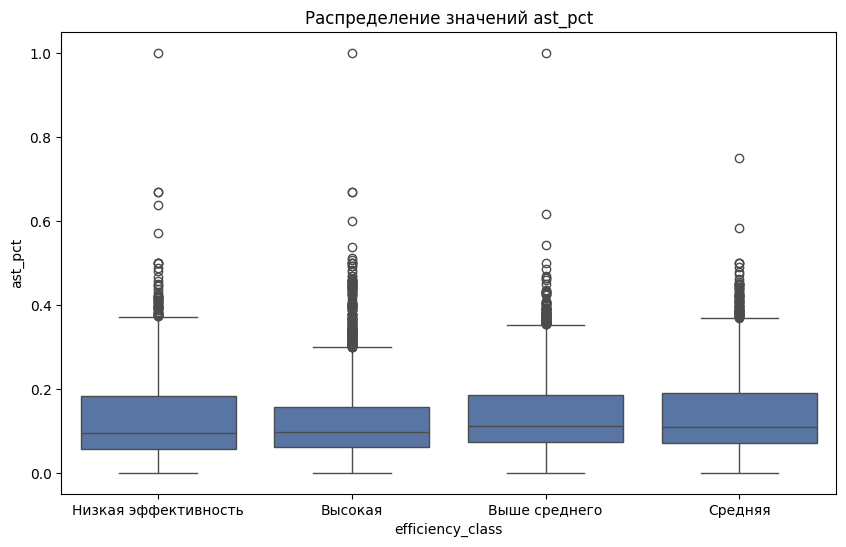

In [73]:
#Для численных колонок
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns[1:]:

    if col != 'ts_pct':
      fig = plt.figure()

      sns.boxplot(y=col, x=df['efficiency_class'], data=df)
      plt.title(f'Распределение значений {col}')
      plt.show()

In [74]:
df.select_dtypes(include=['object']).columns

Index(['player_name', 'team_abbreviation', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'season', 'efficiency_class'],
      dtype='object')

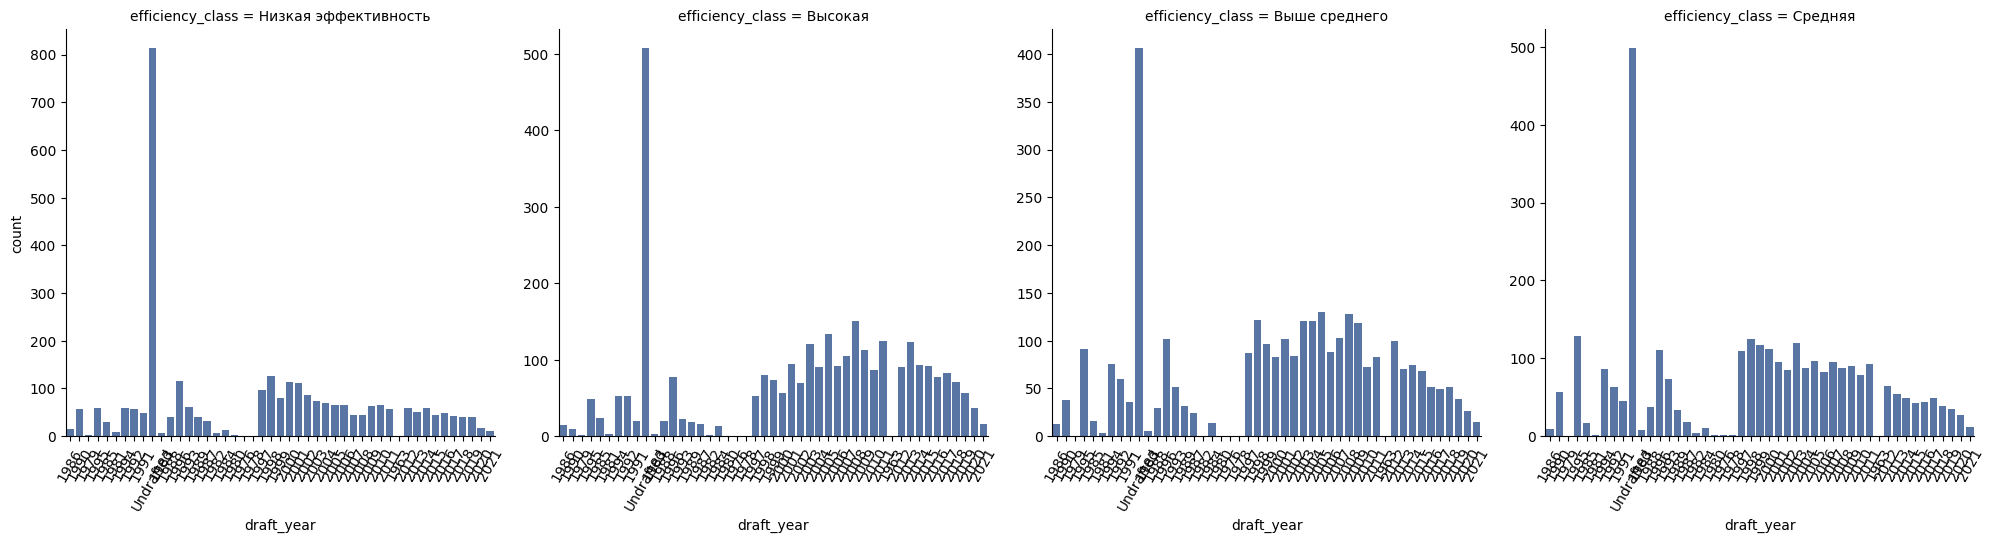

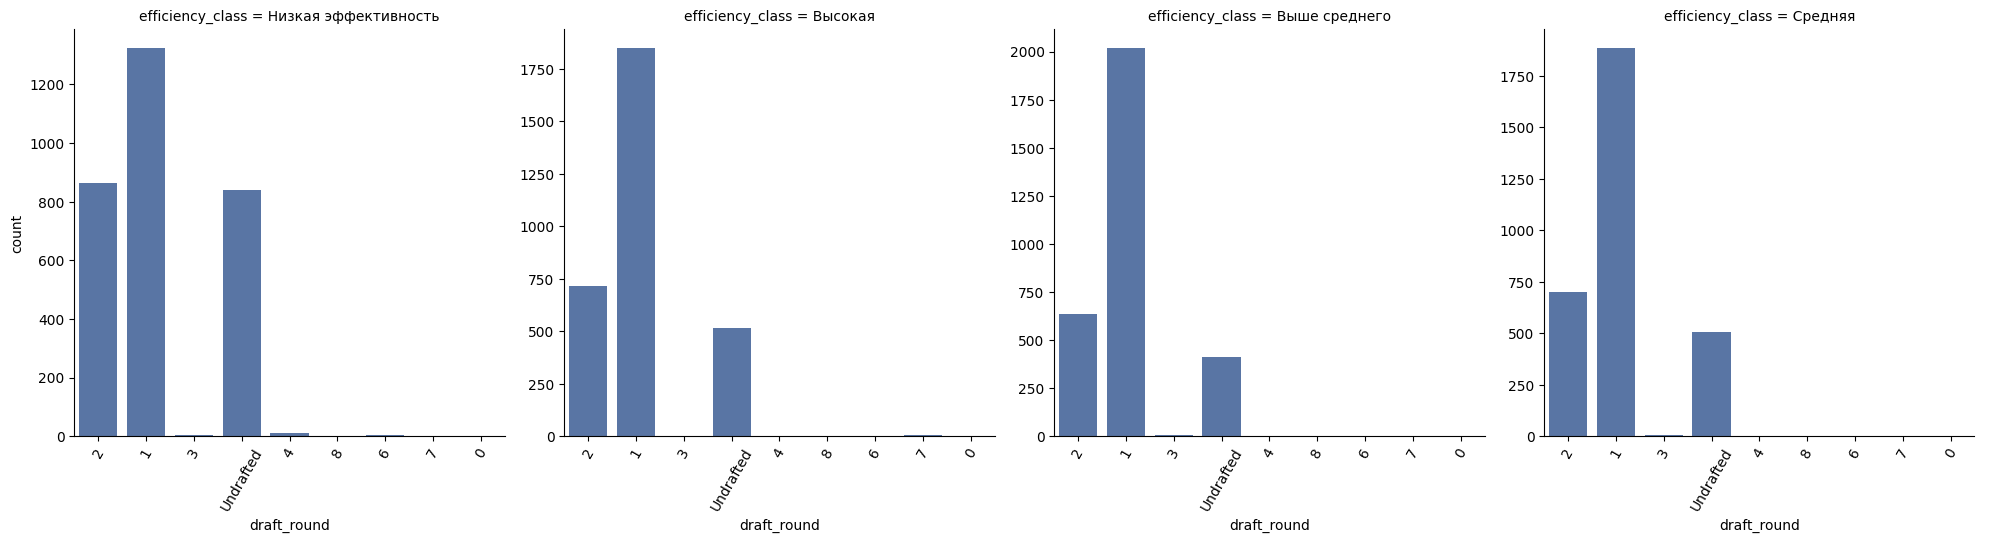

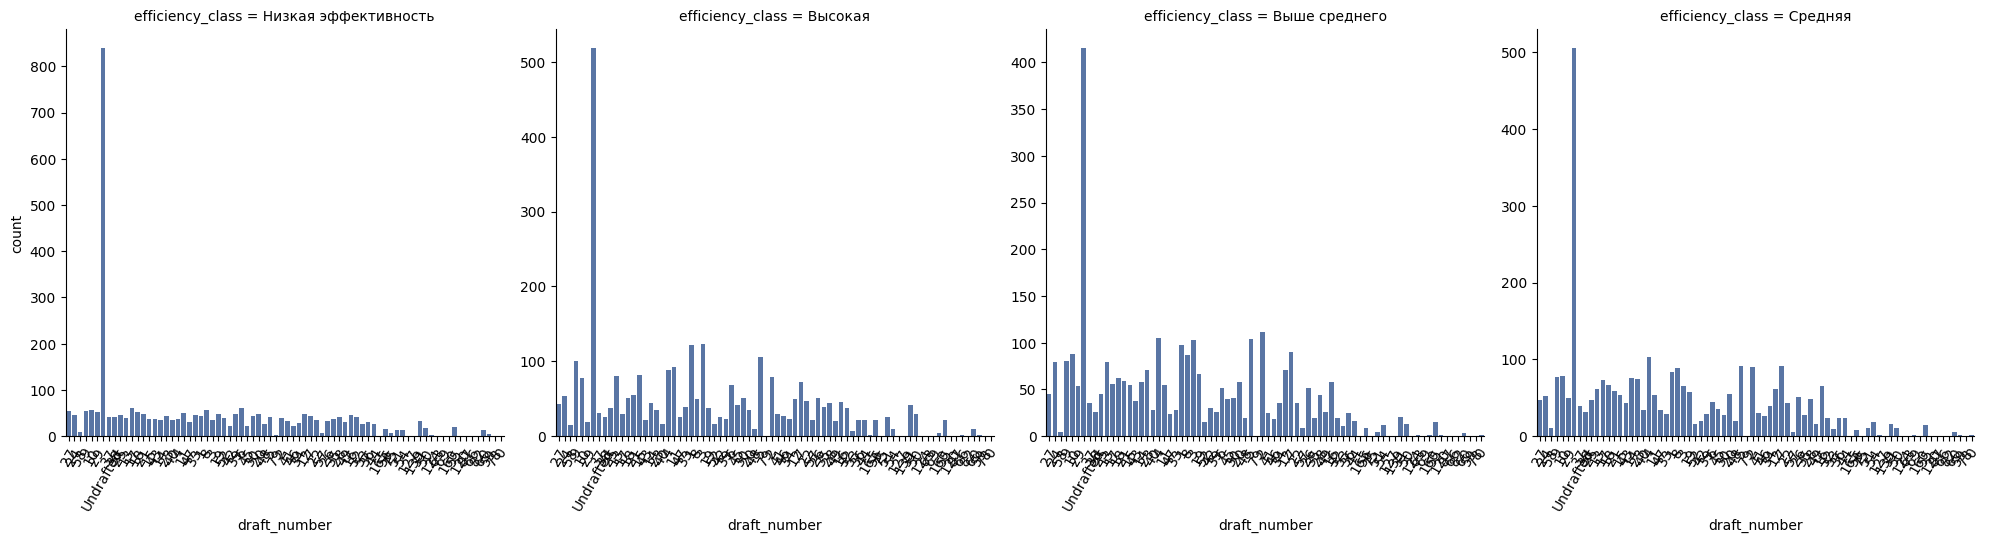

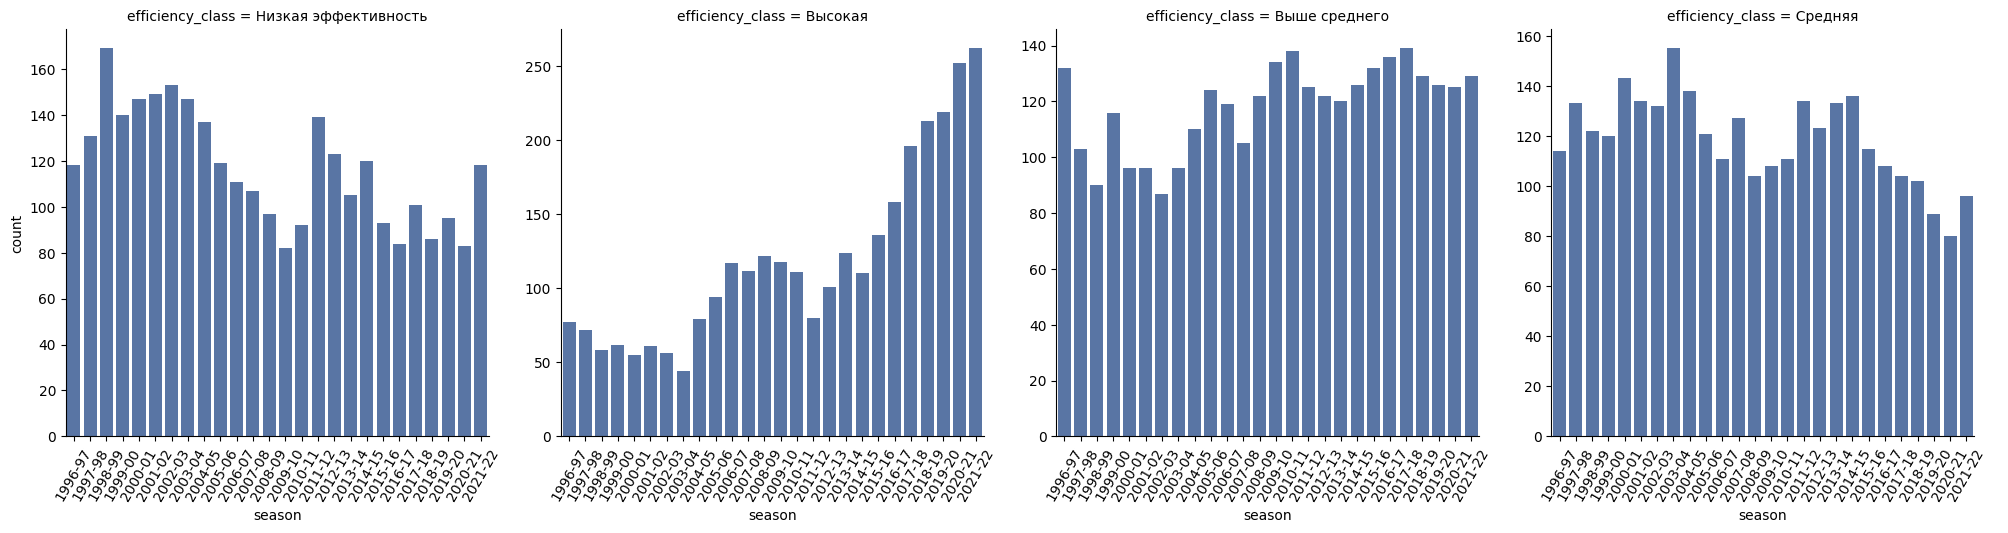

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбор категориальных колонок
categorical_columns = ['draft_year',
       'draft_round', 'draft_number', 'season']

for col in categorical_columns:
        g = sns.catplot(x=col, kind='count', col='efficiency_class', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

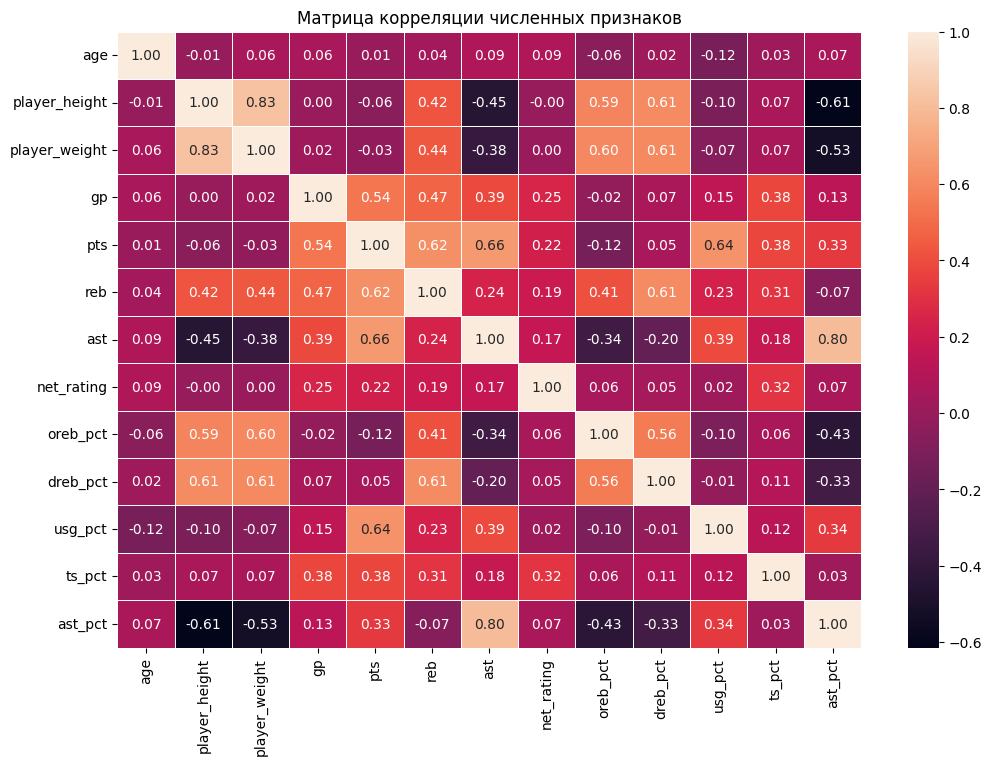

In [76]:
#Построение матрицы корреляции для числовых признаков и выбор наиболее коррелирующих с целевой переменной
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции численных признаков')
plt.show()


In [77]:
tc_pct_corr = correlation_matrix['ts_pct'].sort_values(ascending=False)

In [78]:
tc_pct_corr

ts_pct           1.000000
pts              0.376571
gp               0.375816
net_rating       0.316474
reb              0.314569
ast              0.176083
usg_pct          0.123368
dreb_pct         0.107036
player_height    0.072154
player_weight    0.068142
oreb_pct         0.061805
age              0.025175
ast_pct          0.025034
Name: ts_pct, dtype: float64

In [79]:
#Отбор признаков
features = tc_pct_corr[tc_pct_corr > 0.15].index.tolist()

In [80]:
#Кодирование категорий числовыми значениями
mapping_dict = {'Низкая эффективность': 0, 'Средняя': 1, 'Выше среднего': 2, 'Высокая': 3}
df['efficiency_class_numeric'] = df['efficiency_class'].map(mapping_dict)

In [81]:
X = df[features].drop('ts_pct', axis = 1)
y = df['efficiency_class_numeric']
#Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

###SVM

In [82]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))
])

svm_pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])

In [83]:
#Просмотр результатов классификации
y_pred = svm_pipe.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.549     0.753     0.635       596
           1      0.398     0.358     0.377       625
           2      0.417     0.348     0.379       630
           3      0.494     0.449     0.470       610

    accuracy                          0.474      2461
   macro avg      0.464     0.477     0.465      2461
weighted avg      0.463     0.474     0.463      2461



###GradientBoosting

In [84]:
gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train, y_train)

print(classification_report(y_test, gb_clf.predict(X_test), digits=3))


              precision    recall  f1-score   support

           0      0.566     0.727     0.636       596
           1      0.396     0.362     0.378       625
           2      0.409     0.365     0.386       630
           3      0.500     0.462     0.480       610

    accuracy                          0.476      2461
   macro avg      0.468     0.479     0.470      2461
weighted avg      0.466     0.476     0.468      2461



In [89]:
feature_names = X.columns

# Определение наиболее важных признаков
gb_feature_importances = gb_clf.feature_importances_

for feature_name, importance in zip(feature_names, gb_feature_importances):
    print(f"{feature_name}: {importance}")

pts: 0.5586844977609551
gp: 0.07153971666694019
net_rating: 0.19617179546853136
reb: 0.06516138374485715
ast: 0.10844260635871615


###RandomForest

In [85]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

print(classification_report(y_test, rf_clf.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.569     0.686     0.622       596
           1      0.352     0.317     0.333       625
           2      0.367     0.337     0.351       630
           3      0.457     0.451     0.454       610

    accuracy                          0.445      2461
   macro avg      0.436     0.448     0.440      2461
weighted avg      0.434     0.445     0.438      2461



In [92]:
# Определение наиболее важных признаков
rf_feature_importances = rf_clf.feature_importances_

for feature_name, importance in zip(feature_names, rf_feature_importances):
    print(f"{feature_name}: {importance}")

pts: 0.2527072329016911
gp: 0.18369682861942424
net_rating: 0.2241013871640905
reb: 0.18040014687915124
ast: 0.1590944044356429
